# Load and Train the desire testing dataset files.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# data = pd.read_csv('https://ddosciu.s3.us-east-2.amazonaws.com/CSVs/UNB/Portmap.csv')
# data = pd.read_csv('https://unsw-my.sharepoint.com/:x:/r/personal/z5025758_ad_unsw_edu_au/_layouts/15/Doc.aspx?sourcedoc=%7B2A810F6A-CC3D-4D98-909E-37489D8DAF98%7D&file=UNSW_NB15_testing-set.csv&action=default&mobileredirect=true')
##CIC-DDoS2019 DataSet
data = pd.read_csv("https://ddosciu.s3.us-east-2.amazonaws.com/Portmap.csv")
##UNSW-NB15 DataSet
data_2 = pd.read_csv("https://ddosciu.s3.us-east-2.amazonaws.com/UNSW-NB15_4.csv")
##CIC-IDS2017 DataSet
data_3 = pd.read_csv("https://ddosciu.s3.us-east-2.amazonaws.com/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

/tmp/ipykernel_9291/32133707.py:13: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://ddosciu.s3.us-east-2.amazonaws.com/Portmap.csv")


# Pre-process the data

## Dataset1 Preprocessing

In [2]:
data.head(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN


In [3]:
data.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [4]:
data = data[[' Source IP', ' Source Port',' Destination IP', ' Destination Port',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',' Label']]

# Map labels in data_1 to binary
data[' Label'] = data[' Label'].map({
    'BENIGN': 0,
    'Portmap': 1})

data.head()

,Source IP,Source Port,Destination IP,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Label
0,192.168.50.254,0,224.0.0.5,0,114456999,45,0,0.0,0.0,0
1,192.168.50.253,0,224.0.0.5,0,114347504,56,0,0.0,0.0,0
2,192.168.50.6,54799,172.217.10.98,443,36435473,6,2,116.0,92.0,0
3,192.168.50.6,54800,172.217.7.2,443,36434705,6,2,116.0,92.0,0
4,192.168.50.6,54801,172.217.10.98,443,36434626,6,2,116.0,92.0,0


In [5]:
data[' Label'].value_counts()

1    186960
0      4734
Name:  Label, dtype: int64

In [6]:
import pandas as pd
from sklearn.utils import resample

# Set the desired number of majority class samples
num_majority_samples = 150000  # Adjust this number as needed

# Get the minority class label
minority_class = data[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data[data[' Label'] != minority_class]
minority_samples = data[data[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Upsample the minority class samples
minority_samples_upsampled = resample(
    minority_samples,
    replace=True,  # Sample with replacement
    n_samples=num_majority_samples,  # Match the number of majority samples
    random_state=42  # Reproducible results
)
# Combine the sampled majority class samples and upsampled minority class samples
balanced_data = pd.concat([majority_samples_sampled, minority_samples_upsampled], axis=0)
# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
# Print some information about the balanced dataset
balanced_data.head()
num_unique_labels = balanced_data[' Label'].nunique()
print("Number of unique labels in the balanced data:", num_unique_labels)
label_frequency = balanced_data[' Label'].value_counts()
print("Frequency of each unique label in the balanced data:")
print(label_frequency)
label_frequency_data = data[' Label'].value_counts()
print("Frequency of each unique label in the original data:")
print(label_frequency_data)

Number of unique labels in the balanced data: 2
Frequency of each unique label in the balanced data:
1    150000
0    150000
Name:  Label, dtype: int64
Frequency of each unique label in the original data:
1    186960
0      4734
Name:  Label, dtype: int64


In [7]:
data=balanced_data.copy()

## Dataset2 Preprocessing

In [8]:
data_2.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [9]:
data_2[:200]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2,7,4,1,1,3,NaN,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,175.45.176.0,9910,149.171.126.10,80,tcp,FIN,0.230763,756,1356,62,...,,1,1,1,1,1,1,1,Exploits,1
196,59.166.0.3,53256,149.171.126.2,57469,tcp,FIN,0.291809,4862,82782,31,...,,4,10,1,2,1,1,1,NaN,0
197,59.166.0.5,20197,149.171.126.6,111,udp,CON,0.004321,568,320,31,...,,6,8,4,4,1,1,3,NaN,0
198,59.166.0.5,22425,149.171.126.6,65261,tcp,FIN,0.309355,4400,2976,31,...,,6,8,4,4,1,1,3,NaN,0


In [10]:
data_2['Label'].value_counts()

0    351150
1     88894
Name: Label, dtype: int64

In [11]:
# Print unique values in 'attack_cat' column
print(set(data_2['attack_cat']))

# Replace NaN values with 'Normal'
data_2['attack_cat'].fillna('Normal', inplace=True)

# Filter data_2 to keep only 'DoS' and 'Normal' rows
data_2 = data_2[data_2['attack_cat'].isin(['DoS', 'Normal'])]

# Verify the filtering
print(data_2['attack_cat'].value_counts())

{'Worms', 'DoS', ' Fuzzers ', 'Backdoor', ' Shellcode ', nan, 'Generic', ' Reconnaissance ', 'Analysis', 'Exploits'}
Normal    351150
DoS         4907
Name: attack_cat, dtype: int64


In [12]:
data_2= data_2[['srcip', 'sport', 'dstip', 'dsport','dur',  'Spkts', 'Dpkts', 'sbytes',
       'dbytes', 'Label']]
data_2

,srcip,sport,dstip,dsport,dur,Spkts,Dpkts,sbytes,dbytes,Label
0,59.166.0.9,7045,149.171.126.7,25,0.201886,52,42,37552,3380,0
1,59.166.0.9,9685,149.171.126.2,80,5.864748,364,746,19410,1087890,0
2,59.166.0.2,1421,149.171.126.4,53,0.001391,2,2,146,178,0
3,59.166.0.2,21553,149.171.126.2,25,0.053948,54,42,37812,3380,0
4,59.166.0.8,45212,149.171.126.4,53,0.000953,2,2,146,178,0
...,...,...,...,...,...,...,...,...,...,...
440038,59.166.0.1,38606,149.171.126.9,80,0.564998,262,526,14106,772406,0
440039,59.166.0.5,33094,149.171.126.7,43433,0.087306,6,8,320,1828,0
440040,59.166.0.7,20848,149.171.126.4,21,0.365058,8,6,456,346,0
440041,59.166.0.3,21511,149.171.126.9,21,6.335154,32,30,1802,2088,0


In [13]:
data_2['Label'].value_counts()

0    351150
1      4907
Name: Label, dtype: int64

In [14]:
import pandas as pd
from sklearn.utils import resample

# Set the desired number of majority class samples
num_majority_samples = 15000  # Adjust this number as needed

# Get the minority class label
minority_class = data_2['Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data_2[data_2['Label'] != minority_class]
minority_samples = data_2[data_2['Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Upsample the minority class samples
minority_samples_upsampled = resample(
    minority_samples,
    replace=True,  # Sample with replacement
    n_samples=num_majority_samples,  # Match the number of majority samples
    random_state=42  # Reproducible results
)

# Combine the sampled majority class samples and upsampled minority class samples
balanced_data_2 = pd.concat([majority_samples_sampled, minority_samples_upsampled], axis=0)

# Shuffle the balanced dataset
balanced_data_2 = balanced_data_2.sample(frac=1, random_state=42).reset_index(drop=True)

# Print some information about the balanced dataset
balanced_data.head()
num_unique_labels = balanced_data_2['Label'].nunique()
print("Number of unique labels in the balanced data:", num_unique_labels)
label_frequency = balanced_data_2['Label'].value_counts()
print("Frequency of each unique label in the balanced data:")
print(label_frequency)
label_frequency_data = data_2['Label'].value_counts()
print("Frequency of each unique label in the original data:")
print(label_frequency_data)

Number of unique labels in the balanced data: 2
Frequency of each unique label in the balanced data:
0    15000
1    15000
Name: Label, dtype: int64
Frequency of each unique label in the original data:
0    351150
1      4907
Name: Label, dtype: int64


In [15]:
data_2 =  balanced_data_2.copy()

## Dataset3 Preprocessing

In [16]:
data_3.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [17]:
data_3 = data_3[[' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port',' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',' Label']]

data_3

,Source IP,Source Port,Destination IP,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Label
0,104.16.207.165,443,192.168.10.5,54865,3,2,0,12,0,BENIGN
1,104.16.28.216,80,192.168.10.5,55054,109,1,1,6,6,BENIGN
2,104.16.28.216,80,192.168.10.5,55055,52,1,1,6,6,BENIGN
3,104.17.241.25,443,192.168.10.16,46236,34,1,1,6,6,BENIGN
4,104.19.196.102,443,192.168.10.5,54863,3,2,0,12,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...
225740,72.21.91.29,80,192.168.10.15,61374,61,1,1,6,6,BENIGN
225741,72.21.91.29,80,192.168.10.15,61378,72,1,1,6,6,BENIGN
225742,72.21.91.29,80,192.168.10.15,61375,75,1,1,6,6,BENIGN
225743,8.41.222.187,80,192.168.10.15,61323,48,2,0,12,0,BENIGN


In [18]:
print(set(data_3[' Label']))

data_3[' Label'].value_counts()
# Map labels in data_1 to binary
data_3[' Label'] = data_3[' Label'].map({
    'BENIGN': 0,
    'DDoS': 1})

data_3[' Label']

{'DDoS', 'BENIGN'}


0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name:  Label, Length: 225745, dtype: int64

In [19]:
data_3[' Label'].value_counts()

1    128027
0     97718
Name:  Label, dtype: int64

In [20]:
import pandas as pd
from sklearn.utils import resample

# Set the desired number of majority class samples
num_majority_samples = 15000  # Adjust this number as needed

# Get the minority class label
minority_class = data_3[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data_3[data_3[' Label'] != minority_class]
minority_samples = data_3[data_3[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Upsample the minority class samples
minority_samples_upsampled = resample(
    minority_samples,
    replace=True,  # Sample with replacement
    n_samples=num_majority_samples,  # Match the number of majority samples
    random_state=42  # Reproducible results
)

# Combine the sampled majority class samples and upsampled minority class samples
balanced_data_3 = pd.concat([majority_samples_sampled, minority_samples_upsampled], axis=0)

# Shuffle the balanced dataset
balanced_data_3 = balanced_data_3.sample(frac=1, random_state=42).reset_index(drop=True)

# Print some information about the balanced dataset
balanced_data.head()
num_unique_labels = balanced_data_3[' Label'].nunique()
print("Number of unique labels in the balanced data:", num_unique_labels)
label_frequency = balanced_data_3[' Label'].value_counts()
print("Frequency of each unique label in the balanced data:")
print(label_frequency)
label_frequency_data = data_3[' Label'].value_counts()
print("Frequency of each unique label in the original data:")
print(label_frequency_data)

Number of unique labels in the balanced data: 2
Frequency of each unique label in the balanced data:
1    15000
0    15000
Name:  Label, dtype: int64
Frequency of each unique label in the original data:
1    128027
0     97718
Name:  Label, dtype: int64


In [21]:
data_3 = balanced_data_3.copy()

## Standardizing Columns

In [22]:
data.columns,data_2.columns,data_3.columns,

(Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
        ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
        'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
        ' Label'],
       dtype='object'),
 Index(['srcip', 'sport', 'dstip', 'dsport', 'dur', 'Spkts', 'Dpkts', 'sbytes',
        'dbytes', 'Label'],
       dtype='object'),
 Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
        ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
        'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
        ' Label'],
       dtype='object'))

In [23]:
# Standardize column names
rename_dict = {
    ' Source IP': 'src_ip', ' Source Port': 'src_port', ' Destination IP': 'dst_ip', ' Destination Port': 'dst_port',
    ' Protocol': 'protocol', ' Flow Duration': 'flow_duration', ' Total Fwd Packets': 'total_fwd_packets',
    ' Total Backward Packets': 'total_bwd_packets', 'Total Length of Fwd Packets': 'total_len_fwd_packets',
    ' Total Length of Bwd Packets': 'total_len_bwd_packets', ' Label': 'label',

    'srcip': 'src_ip', 'sport': 'src_port', 'dstip': 'dst_ip', 'dsport': 'dst_port',
    'proto': 'protocol', 'dur': 'flow_duration', 'Spkts': 'total_fwd_packets', 'Dpkts': 'total_bwd_packets',
    'sbytes': 'total_len_fwd_packets', 'dbytes': 'total_len_bwd_packets', 'Label': 'label'
}

data.rename(columns=rename_dict, inplace=True)
data_2.rename(columns=rename_dict, inplace=True)
data_3.rename(columns=rename_dict, inplace=True)

In [24]:
data.columns,data_2.columns,data_3.columns,

(Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
        'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
        'total_len_bwd_packets', 'label'],
       dtype='object'),
 Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
        'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
        'total_len_bwd_packets', 'label'],
       dtype='object'),
 Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
        'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
        'total_len_bwd_packets', 'label'],
       dtype='object'))

## Preparing Data for Training

In [25]:
# Handle missing values
data.fillna(0, inplace=True)
data_2.fillna(0, inplace=True)
data_3.fillna(0, inplace=True)

# Combine the datasets vertically
combined_data = pd.concat([data,data_2, data_3], ignore_index=True)
combined_data

,src_ip,src_port,dst_ip,dst_port,flow_duration,total_fwd_packets,total_bwd_packets,total_len_fwd_packets,total_len_bwd_packets,label
0,172.16.0.5,904,192.168.50.4,58454,2.0,2,0,458.0,0.0,1
1,172.16.0.5,655,192.168.50.4,51264,1.0,2,0,494.0,0.0,1
2,172.16.0.5,649,192.168.50.4,7363,1.0,2,0,422.0,0.0,1
3,192.168.50.9,39600,72.167.239.239,80,68147.0,6,7,862.0,3715.0,0
4,216.58.219.226,443,192.168.50.8,59838,172.0,1,2,6.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...
359995,192.168.10.14,57704,152.195.12.73,443,62465310.0,4,5,104.0,193.0,0
359996,172.16.0.1,40765,192.168.10.50,80,731478.0,3,5,26.0,11601.0,1
359997,172.16.0.1,51227,192.168.10.50,80,7680856.0,5,0,30.0,0.0,1
359998,192.168.10.14,54210,192.168.10.3,53,143915.0,4,2,124.0,222.0,0


In [26]:
combined_data['label'].value_counts()

1    180000
0    180000
Name: label, dtype: int64

In [27]:
combined_data.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
       'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
       'total_len_bwd_packets', 'label'],
      dtype='object')

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Create separate LabelEncoders for each categorical feature
encoder_src_ip = LabelEncoder()
encoder_dst_ip = LabelEncoder()
encoder_src_port = LabelEncoder()
encoder_dst_port = LabelEncoder()

encoder_label = LabelEncoder()

# Fit and transform the categorical features
combined_data['src_ip'] = encoder_src_ip.fit_transform(combined_data['src_ip'])
combined_data['dst_ip'] = encoder_dst_ip.fit_transform(combined_data['dst_ip'])
combined_data['src_port'] = encoder_src_port.fit_transform(combined_data['src_port'])
combined_data['dst_port'] = encoder_dst_port.fit_transform(combined_data['dst_port'].astype(str))

combined_data['label'] = encoder_label.fit_transform(combined_data['label'])

# Save the encoders
with open('encoder_src_ip.pkl', 'wb') as f:
    pickle.dump(encoder_src_ip, f)

with open('encoder_dst_ip.pkl', 'wb') as f:
    pickle.dump(encoder_dst_ip, f)
# Save the encoders
with open('encoder_src_port.pkl', 'wb') as f:
    pickle.dump(encoder_src_port, f)

with open('encoder_dst_port.pkl', 'wb') as f:
    pickle.dump(encoder_dst_port, f)

with open('encoder_label.pkl', 'wb') as f:
    pickle.dump(encoder_label, f)

print("Encoders saved successfully!")
combined_data.head()

Encoders saved successfully!


,src_ip,src_port,dst_ip,dst_port,flow_duration,total_fwd_packets,total_bwd_packets,total_len_fwd_packets,total_len_bwd_packets,label
0,192,410,560,48299,2.0,2,0,458.0,0.0,1
1,192,161,560,41040,1.0,2,0,494.0,0.0,1
2,192,155,560,56311,1.0,2,0,422.0,0.0,1
3,376,12845,1315,56945,68147.0,6,7,862.0,3715.0,0
4,459,14,563,49732,172.0,1,2,6.0,12.0,0


In [29]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   src_ip                 360000 non-null  int64  
 1   src_port               360000 non-null  int64  
 2   dst_ip                 360000 non-null  int64  
 3   dst_port               360000 non-null  int64  
 4   flow_duration          360000 non-null  float64
 5   total_fwd_packets      360000 non-null  int64  
 6   total_bwd_packets      360000 non-null  int64  
 7   total_len_fwd_packets  360000 non-null  float64
 8   total_len_bwd_packets  360000 non-null  float64
 9   label                  360000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 27.5 MB


In [30]:
combined_data['label'].value_counts()

1    180000
0    180000
Name: label, dtype: int64

In [31]:
# Split the data into train and test sets

X = combined_data.drop('label', axis=1)
y = combined_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)

In [32]:
X_train.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
       'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
       'total_len_bwd_packets'],
      dtype='object')

In [33]:
X_train.isnull().sum().sum()

0

In [34]:
import numpy as np

# Function to check for data issues
def check_data_issues(data):
    if data.isnull().values.any():
        print("There are NaN values in the dataset.")
    else:
        print("No NaN values found in the dataset.")

    if np.isinf(data).values.any():
        print("There are infinite values in the dataset.")
    else:
        print("No infinite values found in the dataset.")

    max_value = data.max().max()
    if max_value > np.finfo(np.float64).max:
        print(f"There are values too large for dtype('float64') in the dataset. Max value: {max_value}")
    else:
        print("No values too large for dtype('float64') found in the dataset.")

    min_value = data.min().min()
    if min_value < np.finfo(np.float64).min:
        print(f"There are values too small for dtype('float64') in the dataset. Min value: {min_value}")
    else:
        print("No values too small for dtype('float64') found in the dataset.")

In [35]:
# Separate numeric and categorical columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns

In [36]:
# Separate numeric and categorical columns
numeric_columns,categorical_columns

(Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
        'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
        'total_len_bwd_packets'],
       dtype='object'),
 Index([], dtype='object'))

In [37]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the corresponding column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


# Check the training and testing datasets for issues
print("Checking X_train:")
check_data_issues(X_train)
print("\nChecking X_test:")
check_data_issues(X_test)

Checking X_train:
No NaN values found in the dataset.
No infinite values found in the dataset.
No values too large for dtype('float64') found in the dataset.
No values too small for dtype('float64') found in the dataset.

Checking X_test:
No NaN values found in the dataset.
No infinite values found in the dataset.
No values too large for dtype('float64') found in the dataset.
No values too small for dtype('float64') found in the dataset.


In [39]:
X_train.columns
column_names =X_train.columns
column_names

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
       'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
       'total_len_bwd_packets'],
      dtype='object')

In [40]:
X_train.shape

(288000, 9)

In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from joblib import dump

# Create an empty DataFrame with the desired columns
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])
saved_models = {}  # Dictionary to store saved models


# Train and evaluate machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}
print("X shape",X_train.shape)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the DataFrame
    model_comparison = model_comparison._append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    # Save the trained model weight
    filename = f"{name}_model.joblib"
    dump(model, filename)
    saved_models[name] = filename  # Store the filename for later use in the tested DataSets

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print(classification_report(y_test, y_pred))
    print(f"Model saved as: {filename}")
    print("\n")

display(model_comparison)

X shape (288000, 9)
Logistic Regression:
Accuracy: 0.9666527777777778
F1 score: 0.9666357408375786
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     36000
           1       0.95      0.99      0.97     36000

    accuracy                           0.97     72000
   macro avg       0.97      0.97      0.97     72000
weighted avg       0.97      0.97      0.97     72000

Model saved as: Logistic Regression_model.joblib


Random Forest:
Accuracy: 0.9999861111111111
F1 score: 0.9999861111111085
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36000
           1       1.00      1.00      1.00     36000

    accuracy                           1.00     72000
   macro avg       1.00      1.00      1.00     72000
weighted avg       1.00      1.00      1.00     72000

Model saved as: Random Forest_model.joblib


Support Vector Machine:
Accuracy: 0.9897638888888889
F1 score: 0.9897631803662

,Model,Accuracy,F1 Score
0,Logistic Regression,0.966653,0.966636
1,Random Forest,0.999986,0.999986
2,Support Vector Machine,0.989764,0.989763


Matplotlib is building the font cache; this may take a moment.


Logistic Regression:
Accuracy: 0.9666527777777778
F1 score: 0.9666357408375786
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     36000
           1       0.95      0.99      0.97     36000

    accuracy                           0.97     72000
   macro avg       0.97      0.97      0.97     72000
weighted avg       0.97      0.97      0.97     72000



Random Forest:
Accuracy: 0.9999861111111111
F1 score: 0.9999861111111085
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36000
           1       1.00      1.00      1.00     36000

    accuracy                           1.00     72000
   macro avg       1.00      1.00      1.00     72000
weighted avg       1.00      1.00      1.00     72000



Support Vector Machine:
Accuracy: 0.9897638888888889
F1 score: 0.9897631803662961
Classification Report:
              precision    recall  f1-s

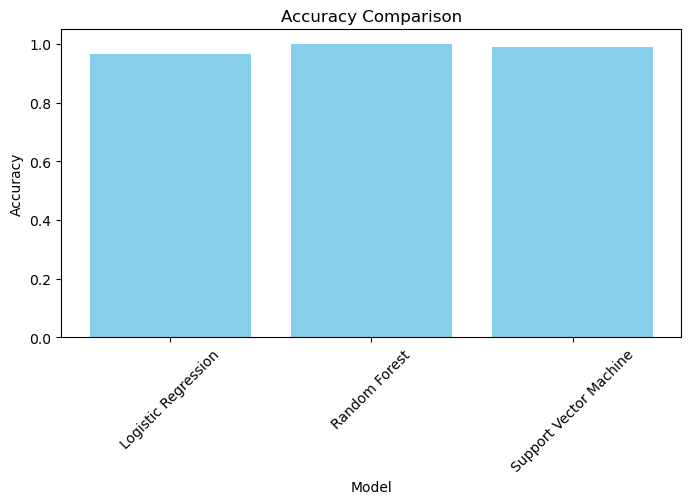

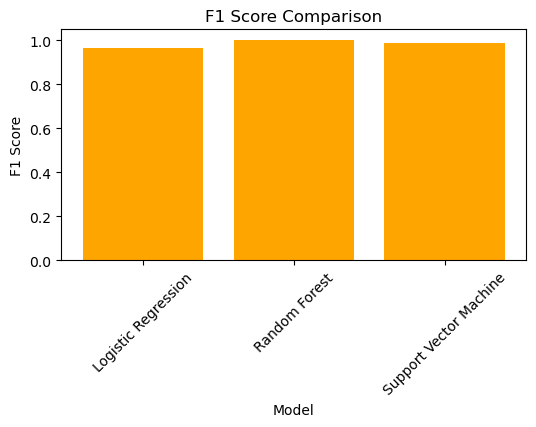

Model Comparison:
                    Model  Accuracy  F1 Score
0     Logistic Regression  0.966653  0.966636
1           Random Forest  0.999986  0.999986
2  Support Vector Machine  0.989764  0.989763


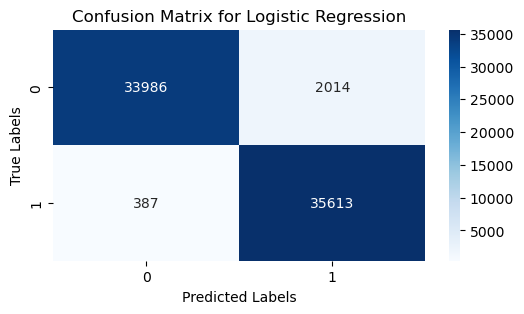

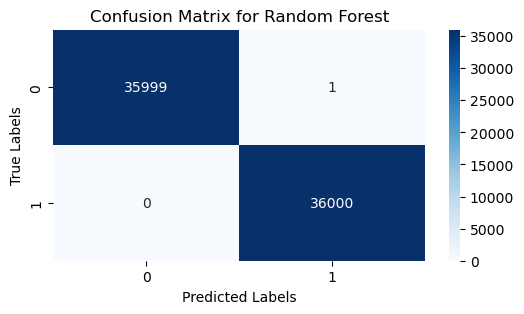

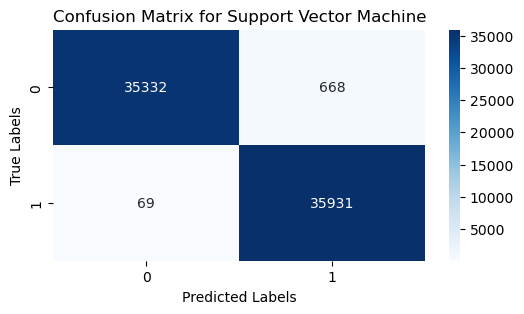

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the DataFrame to store model comparison
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Initialize dictionary to store confusion matrices
confusion_matrices = {}

# Initialize lists to store accuracy and F1 score for each model
accuracy_scores = []
f1_scores = []

# Iterate over each loaded model
for name, model in models.items():
    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Append results to model comparison DataFrame
    model_comparison = model_comparison._append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    # Append accuracy and F1 score to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print model evaluation metrics and confusion matrix
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

# Plotting accuracy scores
plt.figure(figsize=(8, 4))
plt.bar(model_comparison['Model'], accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plotting F1 scores
plt.figure(figsize=(6, 3))
plt.bar(model_comparison['Model'], f1_scores, color='orange')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

# Displaying the model comparison DataFrame
print("Model Comparison:")
print(model_comparison)

# Plot confusion matrices for each model using Seaborn
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Loading Saved model weights

In [43]:
#Load the saved model
from joblib import load

# Load each model individually
# Give path of each model here
logistic_regression_model = load("Logistic Regression_model.joblib")
random_forest_model = load("Random Forest_model.joblib")
svm_model = load("Support Vector Machine_model.joblib")

# Store the loaded models in a dictionary
loaded_models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Support Vector Machine": svm_model
}

In [44]:
loaded_models.items()

dict_items([('Logistic Regression', LogisticRegression(max_iter=1000)), ('Random Forest', RandomForestClassifier()), ('Support Vector Machine', SVC())])

In [45]:
# Load the encoders
with open('encoder_src_ip.pkl', 'rb') as f:
    loaded_encoder_src_ip = pickle.load(f)

with open('encoder_dst_ip.pkl', 'rb') as f:
    loaded_encoder_dst_ip = pickle.load(f)

with open('encoder_label.pkl', 'rb') as f:
    loaded_encoder_label = pickle.load(f)

print("Encoders loaded successfully!")

Encoders loaded successfully!


##Preprocessing For Testing DATA Change Title

In [46]:
feature_columns = X_train.columns
feature_columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'flow_duration',
       'total_fwd_packets', 'total_bwd_packets', 'total_len_fwd_packets',
       'total_len_bwd_packets'],
      dtype='object')

In [47]:
column_mapping = {'Flow ID': 'Flow ID',
 'Src IP': ' Source IP',
 'Src Port': ' Source Port',
 'Dst IP': ' Destination IP',
 'Dst Port': ' Destination Port',
 'Protocol': ' Protocol',
 'Timestamp': ' Timestamp',
 'Flow Duration': ' Flow Duration',
 'Tot Fwd Pkts': ' Total Fwd Packets',
 'Tot Bwd Pkts': ' Total Backward Packets',
 'TotLen Fwd Pkts': 'Total Length of Fwd Packets',
 'TotLen Bwd Pkts': ' Total Length of Bwd Packets',
 'Fwd Pkt Len Max': ' Fwd Packet Length Max',
 'Fwd Pkt Len Min': ' Fwd Packet Length Min',
 'Fwd Pkt Len Mean': ' Fwd Packet Length Mean',
 'Fwd Pkt Len Std': ' Fwd Packet Length Std',
 'Bwd Pkt Len Max': 'Bwd Packet Length Max',
 'Bwd Pkt Len Min': ' Bwd Packet Length Min',
 'Bwd Pkt Len Mean': ' Bwd Packet Length Mean',
 'Bwd Pkt Len Std': ' Bwd Packet Length Std',
 'Flow Byts/s': 'Flow Bytes/s',
 'Flow Pkts/s': ' Flow Packets/s',
 'Flow IAT Mean': ' Flow IAT Mean',
 'Flow IAT Std': ' Flow IAT Std',
 'Flow IAT Max': ' Flow IAT Max',
 'Flow IAT Min': ' Flow IAT Min',
 'Fwd IAT Tot': 'Fwd IAT Total',
 'Fwd IAT Mean': ' Fwd IAT Mean',
 'Fwd IAT Std': ' Fwd IAT Std',
 'Fwd IAT Max': ' Fwd IAT Max',
 'Fwd IAT Min': ' Fwd IAT Min',
 'Bwd IAT Tot': 'Bwd IAT Total',
 'Bwd IAT Mean': ' Bwd IAT Mean',
 'Bwd IAT Std': ' Bwd IAT Std',
 'Bwd IAT Max': ' Bwd IAT Max',
 'Bwd IAT Min': ' Bwd IAT Min',
 'Fwd PSH Flags': 'Fwd PSH Flags',
 'Bwd PSH Flags': ' Bwd PSH Flags',
 'Fwd URG Flags': ' Fwd URG Flags',
 'Bwd URG Flags': ' Bwd URG Flags',
 'Fwd Header Len': ' Fwd Header Length',
 'Bwd Header Len': ' Bwd Header Length',
 'Fwd Pkts/s': 'Fwd Packets/s',
 'Bwd Pkts/s': ' Bwd Packets/s',
 'Pkt Len Min': ' Min Packet Length',
 'Pkt Len Max': ' Max Packet Length',
 'Pkt Len Mean': ' Packet Length Mean',
 'Pkt Len Std': ' Packet Length Std',
 'Pkt Len Var': ' Packet Length Variance',
 'FIN Flag Cnt': 'FIN Flag Count',
 'SYN Flag Cnt': ' SYN Flag Count',
 'RST Flag Cnt': ' RST Flag Count',
 'PSH Flag Cnt': ' PSH Flag Count',
 'ACK Flag Cnt': ' ACK Flag Count',
 'URG Flag Cnt': ' URG Flag Count',
 'CWE Flag Count': ' CWE Flag Count',
 'ECE Flag Cnt': ' ECE Flag Count',
 'Down/Up Ratio': ' Down/Up Ratio',
 'Pkt Size Avg': ' Average Packet Size',
 'Fwd Seg Size Avg': ' Avg Fwd Segment Size',
 'Bwd Seg Size Avg': ' Avg Bwd Segment Size',
 'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
 'Fwd Pkts/b Avg': ' Fwd Avg Packets/Bulk',
 'Fwd Blk Rate Avg': ' Fwd Avg Bulk Rate',
 'Bwd Byts/b Avg': ' Bwd Avg Bytes/Bulk',
 'Bwd Pkts/b Avg': ' Bwd Avg Packets/Bulk',
 'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate',
 'Subflow Fwd Pkts': 'Subflow Fwd Packets',
 'Subflow Fwd Byts': ' Subflow Fwd Bytes',
 'Subflow Bwd Pkts': ' Subflow Bwd Packets',
 'Subflow Bwd Byts': ' Subflow Bwd Bytes',
 'Init Fwd Win Byts': 'Init_Win_bytes_forward',
 'Init Bwd Win Byts': ' Init_Win_bytes_backward',
 'Fwd Act Data Pkts': ' act_data_pkt_fwd',
 'Fwd Seg Size Min': ' min_seg_size_forward',
 'Active Mean': 'Active Mean',
 'Active Std': ' Active Std',
 'Active Max': ' Active Max',
 'Active Min': ' Active Min',
 'Idle Mean': 'Idle Mean',
 'Idle Std': ' Idle Std',
 'Idle Max': ' Idle Max',
 'Idle Min': ' Idle Min',
 'Label': 'Label'}

 # Function to standardize column names
def standardize_columns(df, column_mapping):
    # df = df.rename(columns=column_mapping)
    if ' Label' in df.columns:
        df = df.rename(columns={' Label': 'Label'})
    return df

In [48]:
specific_columns = [' Source IP', ' Source Port',' Destination IP', ' Destination Port',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets','Label']

# Standardize column names
rename_dict = {
    ' Source IP': 'src_ip', ' Source Port': 'src_port', ' Destination IP': 'dst_ip', ' Destination Port': 'dst_port',
    ' Protocol': 'protocol', ' Flow Duration': 'flow_duration', ' Total Fwd Packets': 'total_fwd_packets',
    ' Total Backward Packets': 'total_bwd_packets', 'Total Length of Fwd Packets': 'total_len_fwd_packets',
    ' Total Length of Bwd Packets': 'total_len_bwd_packets', ' Label': 'label',

    'srcip': 'src_ip', 'sport': 'src_port', 'dstip': 'dst_ip', 'dsport': 'dst_port',
    'proto': 'protocol', 'dur': 'flow_duration', 'Spkts': 'total_fwd_packets', 'Dpkts': 'total_bwd_packets',
    'sbytes': 'total_len_fwd_packets', 'dbytes': 'total_len_bwd_packets', 'Label': 'label'
}

# Loading target dataset to test

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the new dataset we going to test the model on:
url = "https://ddosciu.s3.us-east-2.amazonaws.com/PCAPs/Test.csv"
#Test1
url1 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/HTTP_Ddos.pcap_Flow.csv"
url2 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/amp.TCP.syn.optionallyACK.optionallysamePort.pcapng_Flow.csv"
url3 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/amp.TCP.reflection.SYNACK.pcap_Flow.csv"
url4 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/amp.UDP.bacnet.IOT.37810.pcapng_Flow.csv"
url5 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/1.pcap_Flow.csv"
url6 ="https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/amp.dns.RRSIG.fragmented.pcap_Flow.csv"
url7 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/amp.UDP.isakmp.pcap_Flow.csv"
url8 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/pkt.ICMP.largeempty.pcap_Flow.csv"
url9 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/pkt.TCP.DOMINATE.syn.ecn.cwr.pcapng_Flow.csv"
url10 = "/content/NormalTraffic2.pcap_Flow.csv"
url11= "https://ddosciu.s3.us-east-2.amazonaws.com/IC_Taraf.root.1.pcap_Flow.csv"
url12 = "/content/drive/MyDrive/online_tasks/Portmap.csv"
url13 = "https://ddosciu.s3.us-east-2.amazonaws.com/CSV's/Train.csv"
url14 = "/content/drive/MyDrive/online_tasks/UNSW-NB15_4.csv"
url15 = "/content/drive/MyDrive/online_tasks/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
url16 = "https://ddosciu.s3.us-east-2.amazonaws.com/Portmap.csv"
new_data = pd.read_csv(url16)

# Apply the column mapping to the testing data
new_data = standardize_columns(new_data, column_mapping)

new_data = new_data.rename(columns=column_mapping)

/tmp/ipykernel_9291/3943615188.py:25: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(url16)


In [50]:
new_data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191689,141421,172.16.0.5-192.168.50.4-855-47131-17,172.16.0.5,855,192.168.50.4,47131,17,2018-11-03 10:01:48.919833,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Portmap
191690,189763,172.16.0.5-192.168.50.4-856-53617-17,172.16.0.5,856,192.168.50.4,53617,17,2018-11-03 10:01:48.920175,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Portmap
191691,52484,172.16.0.5-192.168.50.4-857-9612-17,172.16.0.5,857,192.168.50.4,9612,17,2018-11-03 10:01:48.920464,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Portmap
191692,176631,172.16.0.5-192.168.50.4-858-23408-17,172.16.0.5,858,192.168.50.4,23408,17,2018-11-03 10:01:48.920466,49,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Portmap


In [51]:
new_data = new_data[specific_columns]
new_data.rename(columns=rename_dict, inplace=True)

/tmp/ipykernel_9291/2947527355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns=rename_dict, inplace=True)


In [52]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   src_ip                 191694 non-null  object 
 1   src_port               191694 non-null  int64  
 2   dst_ip                 191694 non-null  object 
 3   dst_port               191694 non-null  int64  
 4   flow_duration          191694 non-null  int64  
 5   total_fwd_packets      191694 non-null  int64  
 6   total_bwd_packets      191694 non-null  int64  
 7   total_len_fwd_packets  191694 non-null  float64
 8   total_len_bwd_packets  191694 non-null  float64
 9   label                  191694 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 14.6+ MB


In [53]:
len(X.columns),len(new_data.columns)
# Check for missing columns in new_data compared to train data X
missing_columns = set(X.columns) - set(new_data.columns)

# Check for missing columns in train data X compared to new_data
extra_columns = set(new_data.columns) - set(X.columns)

print("Columns missing in new_data:", missing_columns)
print("Columns extra in new_data:", extra_columns)

Columns missing in new_data: set()
Columns extra in new_data: {'label'}


In [54]:
new_data.head(5)

,src_ip,src_port,dst_ip,dst_port,flow_duration,total_fwd_packets,total_bwd_packets,total_len_fwd_packets,total_len_bwd_packets,label
0,192.168.50.254,0,224.0.0.5,0,114456999,45,0,0.0,0.0,BENIGN
1,192.168.50.253,0,224.0.0.5,0,114347504,56,0,0.0,0.0,BENIGN
2,192.168.50.6,54799,172.217.10.98,443,36435473,6,2,116.0,92.0,BENIGN
3,192.168.50.6,54800,172.217.7.2,443,36434705,6,2,116.0,92.0,BENIGN
4,192.168.50.6,54801,172.217.10.98,443,36434626,6,2,116.0,92.0,BENIGN


In [55]:
# Create separate LabelEncoders for each categorical feature
encoder_src_ip = LabelEncoder()
encoder_dst_ip = LabelEncoder()
encoder_src_port = LabelEncoder()
encoder_dst_port = LabelEncoder()

encoder_label = LabelEncoder()

# Fit and transform the categorical features
new_data['src_ip'] = encoder_src_ip.fit_transform(new_data['src_ip'])
new_data['dst_ip'] = encoder_dst_ip.fit_transform(new_data['dst_ip'])
new_data['src_port'] = encoder_src_port.fit_transform(new_data['src_port'])
new_data['dst_port'] = encoder_dst_port.fit_transform(new_data['dst_port'].astype(str))

new_data['label'] = encoder_label.fit_transform(new_data['label'])
new_data.head()

/tmp/ipykernel_9291/2559430284.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['src_ip'] = encoder_src_ip.fit_transform(new_data['src_ip'])
/tmp/ipykernel_9291/2559430284.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['dst_ip'] = encoder_dst_ip.fit_transform(new_data['dst_ip'])
/tmp/ipykernel_9291/2559430284.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,src_ip,src_port,dst_ip,dst_port,flow_duration,total_fwd_packets,total_bwd_packets,total_len_fwd_packets,total_len_bwd_packets,label
0,90,0,124,0,114456999,45,0,0.0,0.0,0
1,89,0,124,0,114347504,56,0,0.0,0.0,0
2,92,1461,33,35314,36435473,6,2,116.0,92.0,0
3,92,1462,76,35314,36434705,6,2,116.0,92.0,0
4,92,1463,33,35314,36434626,6,2,116.0,92.0,0


In [56]:
set(new_data['label'])

{0, 1}

In [57]:
# Inspect the mapping between original labels and encoded numbers
print("Mapping between original labels and encoded numbers:")
for label, encoded_label in zip(encoder_label.classes_, encoder_label.transform(encoder_label.classes_)):
    print(f"{label}: {encoded_label}")

Mapping between original labels and encoded numbers:
BENIGN: 0
Portmap: 1


In [58]:
X_new = new_data.drop('label', axis=1)

In [59]:
X_new.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_new = imputer.fit_transform(X_new)
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

#Labels for comparison (They are not always available for some datasets)
y_new = new_data['label']

In [60]:
y_new.value_counts()

1    186960
0      4734
Name: label, dtype: int64

### Prediction

In [61]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming X_new and y_new are already defined
# Example:
# X_new = ...
# y_new = ...

# Initialize an empty DataFrame for predictions
all_predictions_df = pd.DataFrame()

# Initialize a list to store model names and accuracies
model_names = []
accuracies = []

# Iterate over each loaded model
for name, model in loaded_models.items():
    # Make predictions on test data
    y_pred = model.predict(X_new)

    # Calculate accuracy
    accuracy = accuracy_score(y_new, y_pred)
    accuracies.append(accuracy)

    # Map the predicted labels
    mapped_predictions = ['No Attack' if label == 0 else 'Attack' for label in y_pred]

    # Add the model name to the list
    model_names.append(name)

    # Create a DataFrame for predicted labels
    predicted_labels_df = pd.DataFrame({'Predicted_Label': y_pred, 'Mapped_Prediction': mapped_predictions})

    # Add the DataFrame to the overall DataFrame
    all_predictions_df = pd.concat([all_predictions_df, predicted_labels_df], axis=1)

# Set the column names for the first row
all_predictions_df.columns = pd.MultiIndex.from_product([model_names, ['Predicted_Label', 'Mapped_Prediction']])

# Create a DataFrame for accuracies
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Print the predictions DataFrame
print(all_predictions_df)

# Print the accuracies DataFrame
print(accuracy_df)

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


       Logistic Regression                     Random Forest  \
           Predicted_Label Mapped_Prediction Predicted_Label   
0                        0         No Attack               0   
1                        0         No Attack               0   
2                        0         No Attack               0   
3                        0         No Attack               0   
4                        0         No Attack               0   
...                    ...               ...             ...   
191689                   0         No Attack               0   
191690                   0         No Attack               0   
191691                   0         No Attack               0   
191692                   0         No Attack               0   
191693                   0         No Attack               0   

                         Support Vector Machine                    
       Mapped_Prediction        Predicted_Label Mapped_Prediction  
0              No Attack       

Logistic Regression:
Accuracy: 0.1716224816634845
F1 score: 0.256963294136749
Classification Report:


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.03      0.99      0.06      4734
           1       1.00      0.15      0.26    186960

    accuracy                           0.17    191694
   macro avg       0.51      0.57      0.16    191694
weighted avg       0.97      0.17      0.26    191694





/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest:
Accuracy: 0.024695608626248082
F1 score: 0.0011903497590634575
Classification Report:
              precision    recall  f1-score   support

           0       0.02      1.00      0.05      4734
           1       0.00      0.00      0.00    186960

    accuracy                           0.02    191694
   macro avg       0.01      0.50      0.02    191694
weighted avg       0.00      0.02      0.00    191694





/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Support Vector Machine:
Accuracy: 0.1443550658862562
F1 score: 0.21454145057617724
Classification Report:
              precision    recall  f1-score   support

           0       0.03      1.00      0.05      4734
           1       1.00      0.12      0.22    186960

    accuracy                           0.14    191694
   macro avg       0.51      0.56      0.14    191694
weighted avg       0.98      0.14      0.21    191694





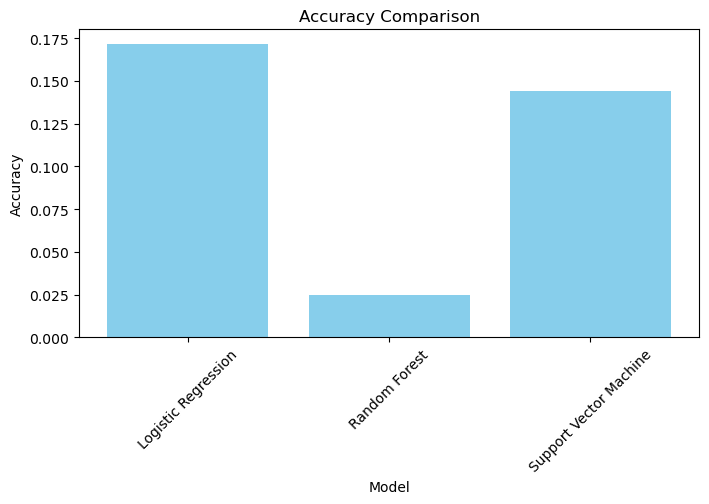

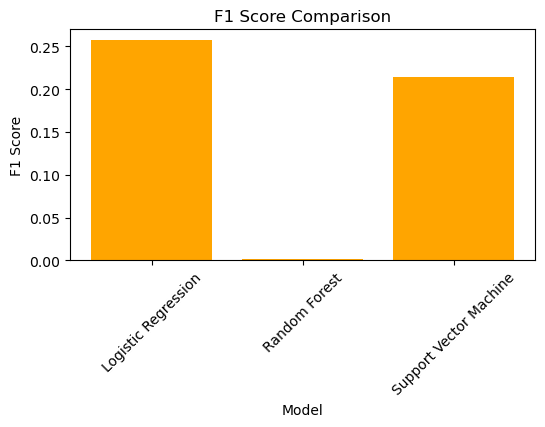

Model Comparison:
                    Model  Accuracy  F1 Score
0     Logistic Regression  0.171622  0.256963
1           Random Forest  0.024696  0.001190
2  Support Vector Machine  0.144355  0.214541


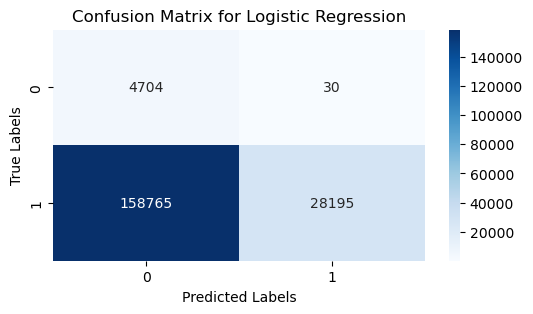

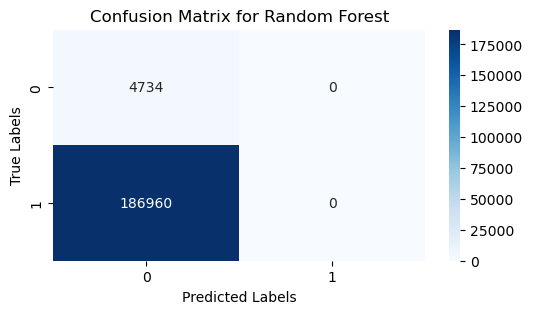

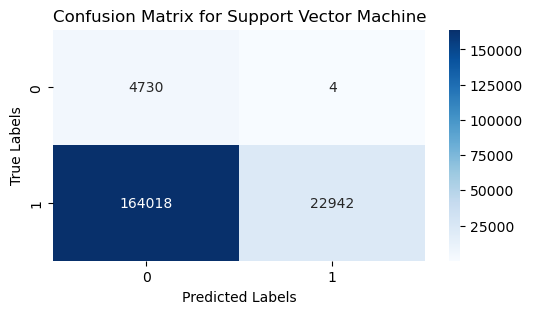

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the DataFrame to store model comparison
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Initialize dictionary to store confusion matrices
confusion_matrices = {}

# Initialize lists to store accuracy and F1 score for each model
accuracy_scores = []
f1_scores = []

# Iterate over each loaded model
for name, model in loaded_models.items():
    # Make predictions on test data
    y_pred = model.predict(X_new)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_new, y_pred)
    f1 = f1_score(y_new, y_pred, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(y_new, y_pred)
    confusion_matrices[name] = cm

    # Append results to model comparison DataFrame
    model_comparison = model_comparison._append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    # Append accuracy and F1 score to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print model evaluation metrics and confusion matrix
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print("Classification Report:")
    print(classification_report(y_new, y_pred))
    print("\n")

# Plotting accuracy scores
plt.figure(figsize=(8, 4))
plt.bar(model_comparison['Model'], accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plotting F1 scores
plt.figure(figsize=(6, 3))
plt.bar(model_comparison['Model'], f1_scores, color='orange')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

# Displaying the model comparison DataFrame
print("Model Comparison:")
print(model_comparison)

# Plot confusion matrices for each model using Seaborn
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()